## Code Run Through in Lecture Notes 7

### Example

• TensorFlow is a Python-friendly open source library for numerical computation well-suited for large-scale ML and deep learning. <br>
• Some key features: <br>
– In TensorFlow, you first define in Python a graph of computations to perform.
– TensorFlow breaks the graph into chunks and run them in parallel across multiple CPU or GPU.

Working with TensorFlow involves two main phases:
1. Build a graph
2. Execute it

<img src='Graph.png' width=500>

In [ ]:
!pip install tensorflow
!pip install keras

In [1]:
# Tf v1
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
a = tf.constant(5)
b = tf.constant(3)
c = tf.multiply(a, b)
d = tf.add(a, b)
e = tf.add(c, d)

The tensorflow core r2.0 have enabled eager execution by default so doesn't need to write tf.compat.v1.Session() and use .run() function <br>
If we want to use tf.compat.v1.Session() then we need to do this <br>
tf.compat.v1.disable_eager_execution() in the starting of algorithm. Now we can use tf.compat.v1.Session() and .run() function.

In [3]:
# tf.disable_eager_execution()
with tf.Session() as sess:
    print(sess.run(e))

23


### Tensor Objects

• Tensor Objects<br>
<ol>
    <li>The central unit of data in TensorFlow is the tensor.</li>
    <li>An n-dimensional array of primitive values.</li>
</ol>
• The main object to manipulate and pass around is the tf.Tensor<br>
• TensorFlow programs work by building a graph of tf.Tensor objects, and running parts of this graph.<br>
• Each Tensor object is specified by:<br>
<ol>
    <li>Rank</li>
    <li>Shape</li>
    <li>Datatype</li>
</ol>

• Rank: the number of dimensions.<br>
– Rank 0: scalar (number), e.g., 19<br>
– Rank 1: vector, e.g., [0, 1]<br>
– Rank 2: matrix, e.g., [[1, 2], [3, 2], [1, 4]]<br>
– Rank n: n-dimensional Tensor (array)<br>
• The tf.rank method determines the rank of a tf.Tensor object.

In [19]:
c = tf.constant([[4], [9], [16], [25]])
r = tf.rank(c) # rank 2


In [20]:
r

<tf.Tensor 'Rank_5:0' shape=() dtype=int32>

In [15]:
c = tf.constant([[[1, 2, 3], [4, 5, 6]],
[[1, 1, 1], [2, 2, 2]]])
s = c.get_shape() # (2, 2, 3)

In [16]:
s

TensorShape([Dimension(2), Dimension(2), Dimension(3)])

In [21]:
c = tf.constant(4.0, dtype=tf.float64)
x = tf.constant([1, 2, 3], dtype=tf.float32)
y = tf.cast(x, tf.int64)

In [4]:
# This name is an intrinsic string name, not to be confused with the name of the variable
c = tf.constant(4.0, dtype=tf.float64, name="input")

### Main Types of Tensor Objects
- Constant
- Variables
- Placeholder (tf.placeholder is deprecated in TensorFlow 2)
    

#### Constant

In [ ]:
# Constants
# Syntax:  tf.constant(<value>, dtype=None, shape=None, name="Const", verify_shape=False)
# <value> can be given as a Python list or a NumPy array

a = tf.constant([[0, 1], [2, 3]], name="b")
b = tf.constant([[4], [9], [16], [25]], name="c")

#### Variables

In [ ]:
# Variables
# A variable represents a Tensor whose value can be changed by running operations on it
# tf.Variable is a class with several operations
# Create variables with tf.get_variable
# tf.get_variable returns an existing variable with the given parameters if it is available


# tf.Variable(<initial-value>, name=<optional-name>)
# w = tf.Variable([[0, 1], [2, 3]], name="matrix")

# tf.get_variable(name, shape=None, dtype=tf.float32,
#                 initializer=None, regularizer=None,
#                 trainable=True, collections=None)
# w = tf.get_variable("matrix",initializer=tf.constant([[0, 1], [2, 3]]))

In [ ]:
# Variables should be initialized before being used

# 1) Initialize all variables at once
# with tf.Session() as sess:
# sess.run(tf.global_variables_initializer())
# 2) Initialize only a subset of variables
# with tf.Session() as sess:
# sess.run(tf.variables_initializer([a, b]))
# 3) Initialize a single variable
# w = tf.Variable(tf.zeros([784,10]))
# with tf.Session() as sess:
# sess.run(w.initializer)

In [24]:
w = tf.get_variable("scalar", initializer=tf.constant(2))
w.assign(100)
with tf.Session() as sess:
    sess.run(w.initializer)
    print(sess.run(w)) # 2

2


In [26]:
w = tf.get_variable("scalar2", initializer=tf.constant(2))
assign_op = w.assign(100)
with tf.Session() as sess:
    sess.run(w.initializer)
    sess.run(assign_op)
    print(sess.run(w)) # 100

100


In [27]:
w = tf.get_variable("scalar3", initializer=tf.constant(2))
w_times_two = w.assign(2 * w)
with tf.Session() as sess:
    sess.run(w.initializer)
    print(sess.run(w_times_two))
    print(sess.run(w_times_two))
    print(sess.run(w_times_two))

4
8
16


In [29]:
w = tf.get_variable("scalar4", initializer=tf.constant(2))
with tf.Session() as sess:
    sess.run(w.initializer) 
    print(sess.run(w.assign_add(10)))    # increment by 10
    print(sess.run(w.assign_sub(5)))     # decrement by 5

12
7


#### Placeholder

Placeholders are built-in structures for feeding input values<br>
Empty variables that will be filled with data later on

In [ ]:
# shape=None means that a tensor of any shape will be accepted
# – E.g., shape=[None, 10]: a matrix with 10 columns and any number of rows
tf.placeholder(dtype, shape=None, name=None)
x = tf.placeholder(tf.float32, shape=[None, 10])

In [31]:
a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)
c = a + b
with tf.Session() as sess:
    print(sess.run(c))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[node Placeholder (defined at <ipython-input-31-ee80964ed5a4>:1) ]]

Original stack trace for 'Placeholder':
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-ee80964ed5a4>", line 1, in <module>
    a = tf.placeholder(tf.float32, shape=[3])
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 3100, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6809, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 744, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3485, in _create_op_internal
    op_def=op_def)
  File "/Users/liushuang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1949, in __init__
    self._traceback = tf_stack.extract_stack()


In [32]:
# Before running the computation, supplement the values to placeholders using a dictionary

a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)
c = a + b
with tf.Session() as sess:
    print(sess.run(c, feed_dict={a: [1, 2, 3]}))


[6. 7. 8.]


### Computation Graph

- A computation graph is a series of TensorFlow operations arranged into a graph
- tf refers to a graph object (the command “import tensorflow as tf” creates a default empty graph)
- The graph is composed of two types of objects:
- Operations: the nodes of the graph that that consume and produce tensors.
- Tensors: the edges in the graph that represent the flowing values throughthe graph (hence the name “TensorFlow”)

In [ ]:
# To get a new empty default graph

tf.reset_default_graph()

### Tensorflow Operations

In [33]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])
print(a.get_shape())
# Out: (2, 3)
b = tf.constant([1, 0, 1])
print(b.get_shape())
b = tf.expand_dims(b, 1)
c = tf.matmul(a, b)

(2, 3)
(3,)


In [34]:
b

<tf.Tensor 'ExpandDims:0' shape=(3, 1) dtype=int32>

In [41]:
c

<tf.Tensor 'MatMul:0' shape=(2, 1) dtype=int32>

### Manage Multiple Graphs
- Besides the default graph, can also create additional graphs, by calling tf.Graph()
- tf.get_default_graph() tells which graph is currently set as the default graph

In [43]:
import tensorflow.compat.v1 as tf
g = tf.Graph()
a = tf.constant(5)
print(a.graph is g) # Out: False
print(a.graph is tf.get_default_graph()) # Out: True

False
True


In [ ]:
# Use as_default() to associate your constructed nodes the a right graph

g_1 = tf.Graph()
with g_1.as_default():
    # Operations created in this scope will be added to `g_1`.
    c = tf.constant([0, 1], "Node in g_1")

### Fetches

In [48]:
# Building the Graph
a = tf.constant(5); 
b = tf.constant(3)
c = tf.multiply(a, b); 
d = tf.add(a, b)
e = tf.add(c, d)
# Executing the Graph
with tf.Session() as sess:
    fetchs = [a,b,c,d,e]
    print(sess.run(fetchs))
    # Output: [5, 3, 15, 8, 23]

[5, 3, 15, 8, 23]


### Run a Graph vs. Evaluate Tensors


In [53]:
# Two ways to run/evaluate a part of graph: Session.run() and Tensor.eval()

# The most important difference is that you can use Session.run() to 
# fetch the values of many tensors in the same step

t = tf.constant(42.0)
u = tf.constant(37.0)
tu = tf.multiply(t, u)
ut = tf.multiply(u, t)
with tf.Session() as sess:
    print(tu.eval()) # runs one step
    print(ut.eval()) # runs one step
    print(sess.run([tu, ut]))
    # evaluates both tensors in a single step


1554.0
1554.0
[1554.0, 1554.0]


### Save Models

In [50]:
v1 = tf.get_variable("v1", shape=[3],
initializer = tf.zeros_initializer)
inc_v1 = v1.assign(v1+1)
# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
# Later, launch the model, initialize the variables,
# do some work, and save the variables to disk.
with tf.Session() as sess:
    sess.run(init_op)
    # Do some work with the model.
    inc_v1.op.run()
    # Save the variables to disk.
    save_path = saver.save(sess, "saved_models/model.ckpt")
    print("Model saved in path: %s" % save_path)

Model saved in path: saved_models/model.ckpt


### Restore Models

In [51]:
tf.reset_default_graph()
# Create a variable.
# The name "v1" must be the same in the saved model.
new_v1 = tf.get_variable("v1", shape=[3])
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
# Later, launch the model, use the saver to restore variables
# from disk, and do some work with the model.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "saved_models/model.ckpt")
    print("Model restored.")
    # Check the values of the variables
    print("v1 : %s" % new_v1.eval())

INFO:tensorflow:Restoring parameters from saved_models/model.ckpt
Model restored.
v1 : [1. 1. 1.]


### TensorBoard

In [5]:
# To visualize your model in TensorBoard, write the graph definition
# and some training stats to a log directory that TensorBoard will read from

tf.reset_default_graph()
# Building the Graph
a = tf.constant(5); 
b = tf.constant(3)
c = tf.multiply(a, b); 
d = tf.add(a, b)
e = tf.add(c, d)
writer = tf.summary.FileWriter('./graphs',tf.get_default_graph())
# Executing the Graph
with tf.Session() as sess:
    print(sess.run(e))

23


In [6]:
!tensorboard --logdir="./graphs" --port 6006

W0812 19:41:12.532459 123145466224640 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0812 19:41:12.532809 123145466224640 plugin_event_accumulator.py:335] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0812 19:41:12.535205 123145466224640 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Tensorflow and Keras Model for Perceptron



### ANN Explanation
<img src='NN2.png'>
<img src='Neuron.png'>
<br>
Activation functions are one of the key elements of the neural network. Without them, our neural network would become a combination of linear functions, so it would be just a linear function itself. Our model would have limited expansiveness, no greater than logistic regression. The non-linearity element allows for greater flexibility and creation of complex functions during the learning process. The activation function also has a significant impact on the speed of learning, which is one of the main criteria for their selection. Currently, the most popular one for hidden layers is probably ReLU. 

<br> Gradient Vanishing (Sigmoid / Tanh)
<img src="Activation.png">
<img src='Forward.png'>
<img src='Backward.png'>
<img src='Correct.png'>
<img src='NN.gif'>

https://medium.com/@purnasaigudikandula/a-beginner-intro-to-neural-networks-543267bda3c8

### ANN Implementation from Scratch

http://neuralnetworksanddeeplearning.com/chap1.html

### Read the abalone dataset


In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('./Data/abalone.data',header = None)
data.columns = ['Sex','Length','Diameter','Height','Whole_weight',
               'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']



In [8]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
data = pd.get_dummies(data)
data.head(10)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1,0,0


### Tensorflow Implementation

In [14]:
df=pd.read_csv("./Data/abalone.data", header=None)
# df = shuffle(df)# shuffle dataset
df.columns = ['Sex','Length','Diameter','Height','Whole_weight',
               'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

df = pd.get_dummies(df)
y = df['Rings']
df=df.drop('Rings',axis=1)
df=np.array(df)
print(len(df),len(y))
#labels and features 
y_train,y_test=np.reshape(np.array(y[0:2798]),(2798,1)),np.reshape(np.array(y[2798:]),(4177-2798,1))#train and test label 
print(y_train.shape,y_test.shape)
x_train,x_test=np.array(df[0:2798]),np.array(df[2798:])#train and test features
print(x_train.shape,x_test.shape)

4177 4177
(2798, 1) (1379, 1)
(2798, 10) (1379, 10)


In [15]:
tf.reset_default_graph()


X = tf.placeholder("float", [None, 10])
Y = tf.placeholder("float", [None, 1])

weights = {
    'h1': tf.Variable(tf.random_normal([10, 10])),
    'h2': tf.Variable(tf.random_normal([10, 10])),
    'out': tf.Variable(tf.random_normal([10, 1]))# 1 ouput label
}
biases = {
    'b1': tf.Variable(tf.random_normal([10])),
    'b2': tf.Variable(tf.random_normal([10])),
    'out': tf.Variable(tf.random_normal([1]))
}


def neural_net(x):
    #hidden layer 1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)#activation
    #hideen layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)#activation
    # output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return (out_layer)

Y_hat=neural_net(X)
loss_op=tf.losses.mean_squared_error(Y,Y_hat)#loss function
optimizer = tf.train.AdamOptimizer(learning_rate=0.01) #define optimizer 
                                                        # play around with learning rate
                                                        # we can also use GD / SGD, etc.

train_op = optimizer.minimize(loss_op)#minimize losss
init = tf.global_variables_initializer()
epoch=2000

with tf.Session() as sess:
    sess.run(init)
    for i in range(0,epoch):
        sess.run(train_op,feed_dict={X:x_train,Y:y_train})
        loss=sess.run(loss_op,feed_dict={X:x_train,Y:y_train})
        if(i%100==0):
            print("epoch no "+str(i),(loss))
        pred = sess.run(Y_hat, feed_dict={X:x_test})
 

writer_model = tf.summary.FileWriter('./nn_graphs',tf.get_default_graph())

epoch no 0 132.28801
epoch no 100 6.9139104
epoch no 200 6.055316
epoch no 300 5.734658
epoch no 400 5.46841
epoch no 500 5.1809745
epoch no 600 5.0101547
epoch no 700 4.913458
epoch no 800 4.8333993
epoch no 900 4.7831907
epoch no 1000 4.741015
epoch no 1100 4.68439
epoch no 1200 4.6595693
epoch no 1300 4.636075
epoch no 1400 4.6092405
epoch no 1500 4.5837126
epoch no 1600 4.555539
epoch no 1700 4.540203
epoch no 1800 4.525646
epoch no 1900 4.508252


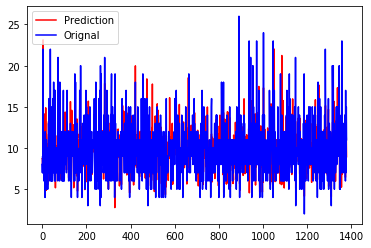

In [113]:
plt.plot((pred), color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Orignal')
plt.legend(loc='upper left')
plt.show()

In [16]:
!tensorboard --logdir="./nn_graphs" --port 6006

W0812 20:47:14.748142 123145523171328 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


### Keras Implementation

In [24]:
labels = data["Rings"]
data = data.drop(['Rings'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
print(y_train[0:10])  # Display first 10 entries

2830     9
925      7
3845    11
547      7
2259    13
3588    12
1450     7
2827     8
2233    17
611      4
Name: Rings, dtype: int64


In [26]:
X_train.shape

(2923, 10)

In [27]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print(X_train[0:1])  # First training sample, normalized

        Length  Diameter    Height  Whole_weight  Shucked_weight  \
2830 -0.009544  0.206767 -0.120703      0.014576        0.311001   

      Viscera_weight  Shell_weight     Sex_F     Sex_I     Sex_M  
2830       -0.020979     -0.425335  1.463652 -0.679222 -0.759766  


In [29]:
import keras

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, epochs=500,
                    validation_split=0.2, verbose=2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 2338 samples, validate on 585 samples
Epoch 1/500
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
2338/2338 - 0s - loss: 40.5919 - mean_absolute_error: 4.9967 - val_loss: 8.7106 - val_mean_absolute_error: 2.1216
Epoch 2/500
2338/2338 - 0s - loss: 7.9305 - mean_absolute_error: 1.8721 - val_loss: 4.3301 - val_mean_absolute_error: 1.4814
Epoch 3/500
2338/2338 - 0s - loss: 6.3544 - mean_absolute_error: 1.6923 - val_loss: 5.2084 - val_mean_absolute_error: 1.5947
Epoch 4/500
2338/2338 - 0s - loss: 6.0072 - mean_absolute_error: 1.6667 - val_loss: 4.3176 - val_mean_absolute_error: 1.4572
Epoch 5/500
2338/2338 - 0s - loss: 5.6363 - mean_absolute_error: 1.6274 - val_loss: 5.6409 - val_mean_absolute_error: 1.7352
Epoch 6/500
2338/2338 - 0s - loss: 5.5007 - mean_absolute_error: 1.6240 - val_loss: 4.4045 -

Epoch 60/500
2338/2338 - 0s - loss: 4.2091 - mean_absolute_error: 1.4774 - val_loss: 4.2305 - val_mean_absolute_error: 1.5397
Epoch 61/500
2338/2338 - 0s - loss: 4.2818 - mean_absolute_error: 1.4835 - val_loss: 5.0954 - val_mean_absolute_error: 1.8203
Epoch 62/500
2338/2338 - 0s - loss: 4.2359 - mean_absolute_error: 1.4782 - val_loss: 4.0641 - val_mean_absolute_error: 1.4907
Epoch 63/500
2338/2338 - 0s - loss: 4.2470 - mean_absolute_error: 1.4773 - val_loss: 3.8947 - val_mean_absolute_error: 1.4643
Epoch 64/500
2338/2338 - 0s - loss: 4.2530 - mean_absolute_error: 1.4757 - val_loss: 3.6690 - val_mean_absolute_error: 1.3471
Epoch 65/500
2338/2338 - 0s - loss: 4.1768 - mean_absolute_error: 1.4696 - val_loss: 3.8073 - val_mean_absolute_error: 1.3687
Epoch 66/500
2338/2338 - 0s - loss: 4.1904 - mean_absolute_error: 1.4650 - val_loss: 4.5398 - val_mean_absolute_error: 1.6189
Epoch 67/500
2338/2338 - 0s - loss: 4.1713 - mean_absolute_error: 1.4688 - val_loss: 5.7943 - val_mean_absolute_error:

Epoch 125/500
2338/2338 - 0s - loss: 3.7576 - mean_absolute_error: 1.3870 - val_loss: 4.2456 - val_mean_absolute_error: 1.5046
Epoch 126/500
2338/2338 - 0s - loss: 3.7259 - mean_absolute_error: 1.3823 - val_loss: 4.1364 - val_mean_absolute_error: 1.5212
Epoch 127/500
2338/2338 - 0s - loss: 3.6628 - mean_absolute_error: 1.3733 - val_loss: 4.2402 - val_mean_absolute_error: 1.5972
Epoch 128/500
2338/2338 - 0s - loss: 3.7183 - mean_absolute_error: 1.3949 - val_loss: 3.8625 - val_mean_absolute_error: 1.4058
Epoch 129/500
2338/2338 - 0s - loss: 3.7240 - mean_absolute_error: 1.3731 - val_loss: 4.0257 - val_mean_absolute_error: 1.4005
Epoch 130/500
2338/2338 - 0s - loss: 3.6438 - mean_absolute_error: 1.3728 - val_loss: 4.2708 - val_mean_absolute_error: 1.5374
Epoch 131/500
2338/2338 - 0s - loss: 3.6910 - mean_absolute_error: 1.3735 - val_loss: 3.9064 - val_mean_absolute_error: 1.4265
Epoch 132/500
2338/2338 - 0s - loss: 3.6907 - mean_absolute_error: 1.3676 - val_loss: 4.0136 - val_mean_absolut

Epoch 190/500
2338/2338 - 0s - loss: 3.2117 - mean_absolute_error: 1.2914 - val_loss: 4.0248 - val_mean_absolute_error: 1.4406
Epoch 191/500
2338/2338 - 0s - loss: 3.1672 - mean_absolute_error: 1.2761 - val_loss: 4.6818 - val_mean_absolute_error: 1.5689
Epoch 192/500
2338/2338 - 0s - loss: 3.2385 - mean_absolute_error: 1.2882 - val_loss: 4.6362 - val_mean_absolute_error: 1.5859
Epoch 193/500
2338/2338 - 0s - loss: 3.1438 - mean_absolute_error: 1.2716 - val_loss: 6.6220 - val_mean_absolute_error: 1.8985
Epoch 194/500
2338/2338 - 0s - loss: 3.1459 - mean_absolute_error: 1.2871 - val_loss: 6.2111 - val_mean_absolute_error: 1.8361
Epoch 195/500
2338/2338 - 0s - loss: 3.1311 - mean_absolute_error: 1.2864 - val_loss: 4.3548 - val_mean_absolute_error: 1.5320
Epoch 196/500
2338/2338 - 0s - loss: 3.1321 - mean_absolute_error: 1.2733 - val_loss: 4.9454 - val_mean_absolute_error: 1.5660
Epoch 197/500
2338/2338 - 0s - loss: 3.1524 - mean_absolute_error: 1.2877 - val_loss: 3.8863 - val_mean_absolut

Epoch 255/500
2338/2338 - 0s - loss: 2.7946 - mean_absolute_error: 1.2014 - val_loss: 6.1382 - val_mean_absolute_error: 1.7651
Epoch 256/500
2338/2338 - 0s - loss: 2.7079 - mean_absolute_error: 1.1939 - val_loss: 4.6429 - val_mean_absolute_error: 1.5470
Epoch 257/500
2338/2338 - 0s - loss: 2.6502 - mean_absolute_error: 1.1893 - val_loss: 5.0026 - val_mean_absolute_error: 1.5626
Epoch 258/500
2338/2338 - 0s - loss: 2.6833 - mean_absolute_error: 1.1928 - val_loss: 4.5431 - val_mean_absolute_error: 1.5233
Epoch 259/500
2338/2338 - 0s - loss: 2.6349 - mean_absolute_error: 1.1845 - val_loss: 4.7398 - val_mean_absolute_error: 1.5392
Epoch 260/500
2338/2338 - 0s - loss: 2.6591 - mean_absolute_error: 1.1838 - val_loss: 4.2787 - val_mean_absolute_error: 1.4861
Epoch 261/500
2338/2338 - 0s - loss: 2.6085 - mean_absolute_error: 1.1803 - val_loss: 5.0467 - val_mean_absolute_error: 1.6579
Epoch 262/500
2338/2338 - 0s - loss: 2.6241 - mean_absolute_error: 1.1772 - val_loss: 4.7582 - val_mean_absolut

Epoch 320/500
2338/2338 - 0s - loss: 2.2747 - mean_absolute_error: 1.1073 - val_loss: 4.4042 - val_mean_absolute_error: 1.5275
Epoch 321/500
2338/2338 - 0s - loss: 2.2715 - mean_absolute_error: 1.1064 - val_loss: 4.5707 - val_mean_absolute_error: 1.5416
Epoch 322/500
2338/2338 - 0s - loss: 2.3055 - mean_absolute_error: 1.1087 - val_loss: 4.8200 - val_mean_absolute_error: 1.5618
Epoch 323/500
2338/2338 - 0s - loss: 2.2683 - mean_absolute_error: 1.1054 - val_loss: 5.5817 - val_mean_absolute_error: 1.7441
Epoch 324/500
2338/2338 - 0s - loss: 2.1909 - mean_absolute_error: 1.0892 - val_loss: 4.6522 - val_mean_absolute_error: 1.5432
Epoch 325/500
2338/2338 - 0s - loss: 2.2476 - mean_absolute_error: 1.1070 - val_loss: 5.0570 - val_mean_absolute_error: 1.6092
Epoch 326/500
2338/2338 - 0s - loss: 2.2815 - mean_absolute_error: 1.0992 - val_loss: 5.0782 - val_mean_absolute_error: 1.5658
Epoch 327/500
2338/2338 - 0s - loss: 2.2389 - mean_absolute_error: 1.0969 - val_loss: 6.5877 - val_mean_absolut

Epoch 385/500
2338/2338 - 0s - loss: 1.9469 - mean_absolute_error: 1.0309 - val_loss: 5.5030 - val_mean_absolute_error: 1.6561
Epoch 386/500
2338/2338 - 0s - loss: 2.0008 - mean_absolute_error: 1.0541 - val_loss: 6.2981 - val_mean_absolute_error: 1.8145
Epoch 387/500
2338/2338 - 0s - loss: 1.9849 - mean_absolute_error: 1.0425 - val_loss: 5.4383 - val_mean_absolute_error: 1.6473
Epoch 388/500
2338/2338 - 0s - loss: 1.9431 - mean_absolute_error: 1.0242 - val_loss: 4.8787 - val_mean_absolute_error: 1.5519
Epoch 389/500
2338/2338 - 0s - loss: 1.9314 - mean_absolute_error: 1.0353 - val_loss: 5.0046 - val_mean_absolute_error: 1.5795
Epoch 390/500
2338/2338 - 0s - loss: 1.9728 - mean_absolute_error: 1.0374 - val_loss: 5.4879 - val_mean_absolute_error: 1.6332
Epoch 391/500
2338/2338 - 0s - loss: 1.8992 - mean_absolute_error: 1.0192 - val_loss: 5.0970 - val_mean_absolute_error: 1.5812
Epoch 392/500
2338/2338 - 0s - loss: 1.9268 - mean_absolute_error: 1.0243 - val_loss: 5.1037 - val_mean_absolut

Epoch 450/500
2338/2338 - 0s - loss: 1.6796 - mean_absolute_error: 0.9680 - val_loss: 6.2130 - val_mean_absolute_error: 1.7409
Epoch 451/500
2338/2338 - 0s - loss: 1.7254 - mean_absolute_error: 0.9754 - val_loss: 5.3880 - val_mean_absolute_error: 1.6181
Epoch 452/500
2338/2338 - 0s - loss: 1.6608 - mean_absolute_error: 0.9586 - val_loss: 5.6350 - val_mean_absolute_error: 1.6806
Epoch 453/500
2338/2338 - 0s - loss: 1.7027 - mean_absolute_error: 0.9691 - val_loss: 5.9245 - val_mean_absolute_error: 1.6883
Epoch 454/500
2338/2338 - 0s - loss: 1.6891 - mean_absolute_error: 0.9603 - val_loss: 5.3236 - val_mean_absolute_error: 1.6183
Epoch 455/500
2338/2338 - 0s - loss: 1.7033 - mean_absolute_error: 0.9727 - val_loss: 5.8911 - val_mean_absolute_error: 1.7071
Epoch 456/500
2338/2338 - 0s - loss: 1.7179 - mean_absolute_error: 0.9683 - val_loss: 5.3296 - val_mean_absolute_error: 1.6125
Epoch 457/500
2338/2338 - 0s - loss: 1.6872 - mean_absolute_error: 0.9596 - val_loss: 5.8839 - val_mean_absolut

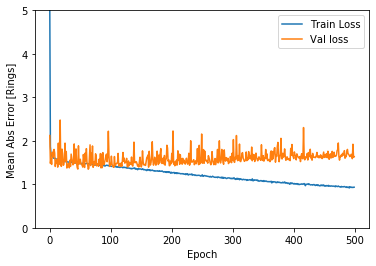

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Rings]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)

In [32]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:    1.73


In [33]:
test_predictions = model.predict(X_test).flatten()

print(test_predictions)

[10.663778   8.629157  14.722336  ...  7.9114356  9.80379    9.441606 ]


In [34]:
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64